### Before providing the answers to the question, we first have to clean the data.

In [77]:
import seaborn as sns   # Importing all of the needed libraries for performing operation on data, visualizing and creating models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor,plot_importance
from sklearn import metrics
import requests
import holidays
pd.set_option('display.max_columns',30)

In [2]:
df=pd.read_csv('AC_Data.csv') #Reading Data from CSV file

In [3]:
df.shape   #Checking the shape of file i.e. no. of rows and columns

(87840, 19)

In [4]:
df.info()  # Checking the data type of all of the presence and presence of null values. From here we can see that almost 
           # 40% values are null in most of the columns. Also object type data is present which needs to be converted to suitable type based on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


In [5]:
df.head() # Checking how the data looks. From 2nd and 4th row we can see that the whole row is having null value. 
          # Thus its better to drop such records rather than imputing them.

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [6]:
df['Date']=pd.to_datetime(df['0']).dt.date   # Splitting the present datetime column into separate columns.
df['Time']=pd.to_datetime(df['0']).dt.hour

In [7]:
df.drop('0',axis=1,inplace=True)   # Dropping the original column

In [8]:
# Removind all rows where every column is null except Date and Time Column
df.drop(df[df[df.columns.difference(['Date','Time'])].isnull().all(1)==True].index,inplace=True) 


NumExpr defaulting to 8 threads.


In [9]:
df.info() #Checking how the data looks now. Data looks much better now.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51979 entries, 0 to 87839
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC 1    43708 non-null  float64
 1   AC 2    43711 non-null  float64
 2   AC 3    43713 non-null  float64
 3   AC 4    43704 non-null  float64
 4   AC 5    43716 non-null  float64
 5   AC 6    43717 non-null  float64
 6   AC 7    43679 non-null  float64
 7   AC 8    43704 non-null  float64
 8   AC 9    43654 non-null  float64
 9   AC 10   43690 non-null  float64
 10  AC 11   43670 non-null  float64
 11  AC 12   43713 non-null  float64
 12  AC 13   43719 non-null  float64
 13  AC 14   43696 non-null  float64
 14  AC 15   43715 non-null  float64
 15  AC 16   43710 non-null  float64
 16  AC 17   43714 non-null  float64
 17  AC 18   43723 non-null  float64
 18  Date    51979 non-null  object 
 19  Time    51979 non-null  int64  
dtypes: float64(18), int64(1), object(1)
memory usage: 8.3+ MB


In [10]:
df.isnull().mean()*100  # We can see here that approx 15% of data is still null in all column but it is at random. 
                        # Not like earlier scenario where all features of a row are null

AC 1     15.912195
AC 2     15.906424
AC 3     15.902576
AC 4     15.919891
AC 5     15.896804
AC 6     15.894881
AC 7     15.967987
AC 8     15.919891
AC 9     16.016083
AC 10    15.946825
AC 11    15.985302
AC 12    15.902576
AC 13    15.891033
AC 14    15.935282
AC 15    15.898728
AC 16    15.908348
AC 17    15.900652
AC 18    15.883338
Date      0.000000
Time      0.000000
dtype: float64

In [11]:
for i in df.columns.difference(['Date','Time']): # Imputing missing value in all columns except Time and Date with the mean of the column 
    df[i].fillna(df[i].mean(),inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51979 entries, 0 to 87839
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC 1    51979 non-null  float64
 1   AC 2    51979 non-null  float64
 2   AC 3    51979 non-null  float64
 3   AC 4    51979 non-null  float64
 4   AC 5    51979 non-null  float64
 5   AC 6    51979 non-null  float64
 6   AC 7    51979 non-null  float64
 7   AC 8    51979 non-null  float64
 8   AC 9    51979 non-null  float64
 9   AC 10   51979 non-null  float64
 10  AC 11   51979 non-null  float64
 11  AC 12   51979 non-null  float64
 12  AC 13   51979 non-null  float64
 13  AC 14   51979 non-null  float64
 14  AC 15   51979 non-null  float64
 15  AC 16   51979 non-null  float64
 16  AC 17   51979 non-null  float64
 17  AC 18   51979 non-null  float64
 18  Date    51979 non-null  object 
 19  Time    51979 non-null  int64  
dtypes: float64(18), int64(1), object(1)
memory usage: 8.3+ MB


#### Now that we can removed the presence of null values, we can look for the presence of outliers if any.

In [13]:
df.describe() # From here we can see that 50% of data lies in between 2-4 for most of the columns where as the max value 
              # is more than 10 which represents outlier

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Time
count,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676,11.530137
std,2.087792,2.333961,1.364111,1.648245,0.703597,1.518292,1.350738,1.379535,1.395066,0.628433,1.424827,1.316957,1.694052,1.333991,1.849628,1.472942,1.032138,2.127092,6.927586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.546536,1.875004,1.541800,1.051897,1.865673,2.352739,1.962985,2.446663,1.192033,1.775423,2.113809,3.435355,2.037829,3.188390,2.042392,4.078496,5.025472,6.000000
50%,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.454127,6.594090,12.000000
75%,3.306060,5.028518,3.210289,3.191217,1.753227,3.412195,3.692065,3.294037,3.863234,1.861172,3.041350,3.384037,5.123647,3.603754,4.929061,3.459576,4.896242,8.077507,18.000000
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031,23.000000


Skewness in data of feature AC 1 = 0.9509940327390939


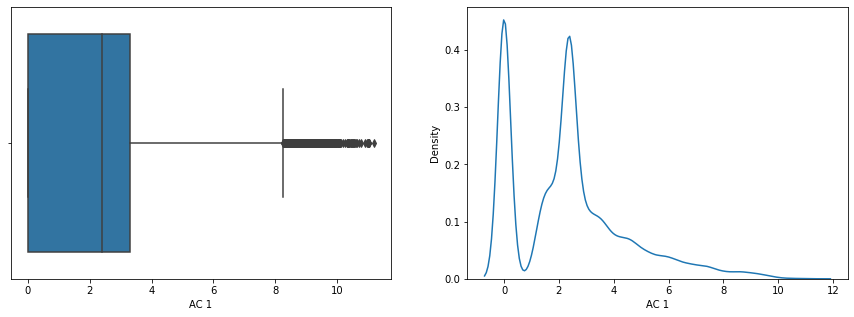

Skewness in data of feature AC 10 = 0.11962732632833789


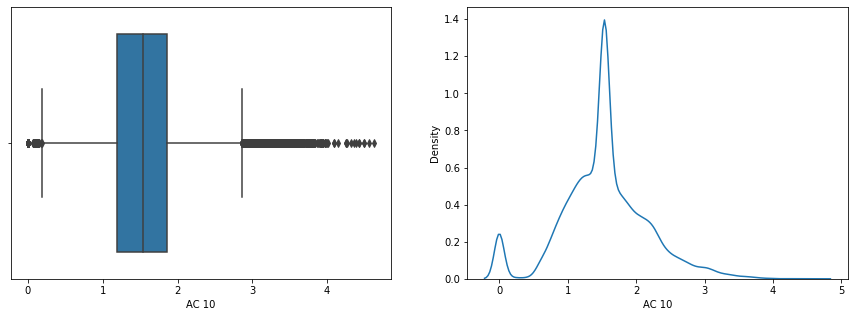

Skewness in data of feature AC 11 = 0.567785948812494


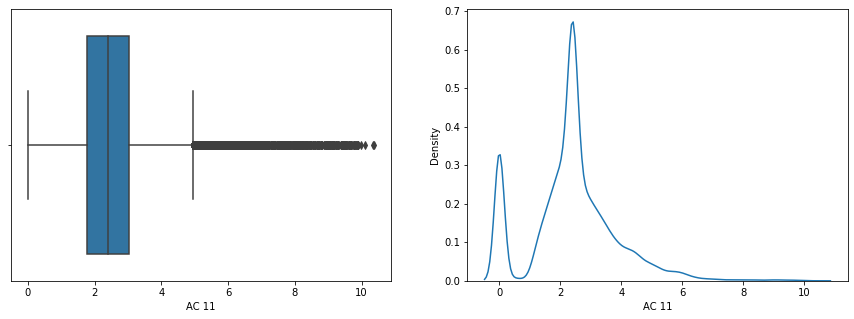

Skewness in data of feature AC 12 = 0.05062623601701093


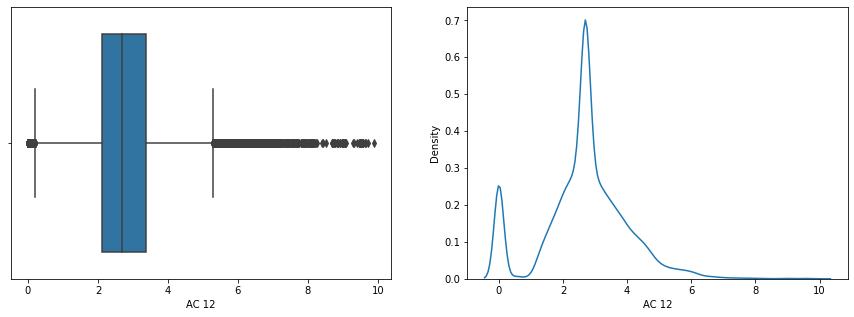

Skewness in data of feature AC 13 = -0.044341186866327875


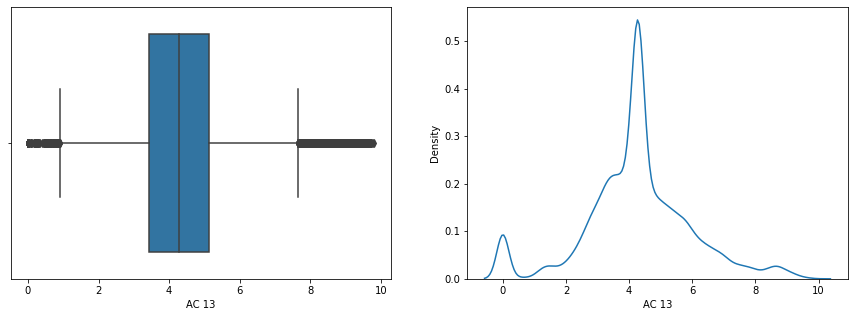

Skewness in data of feature AC 14 = 0.5168870077233931


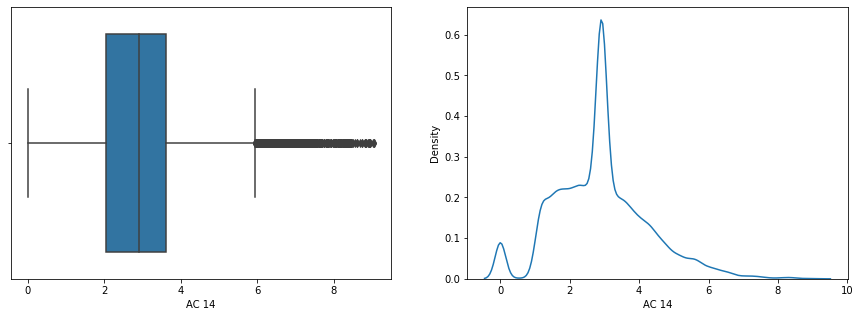

Skewness in data of feature AC 15 = -0.05428442793665203


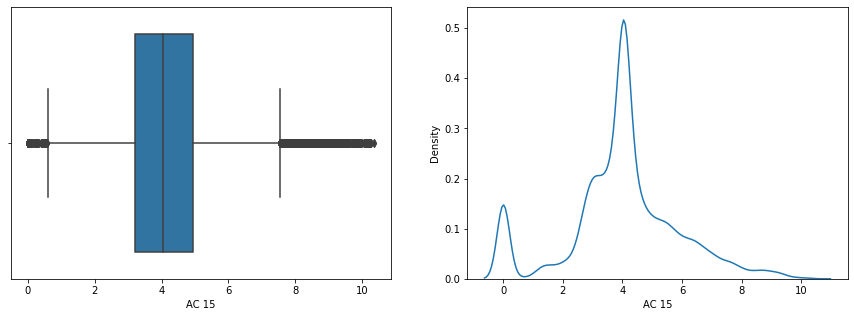

Skewness in data of feature AC 16 = 0.5173711445815657


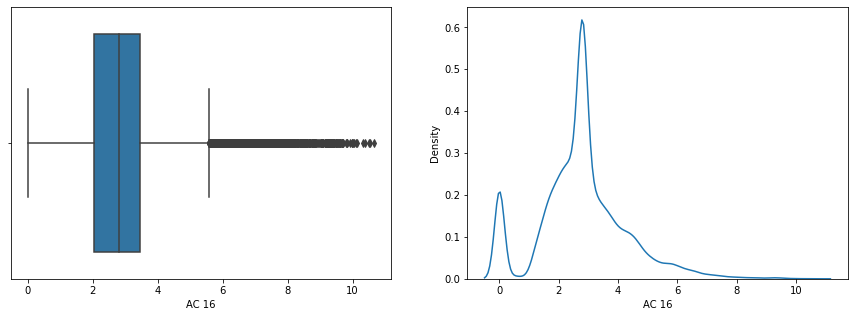

Skewness in data of feature AC 17 = -1.8651592487670765


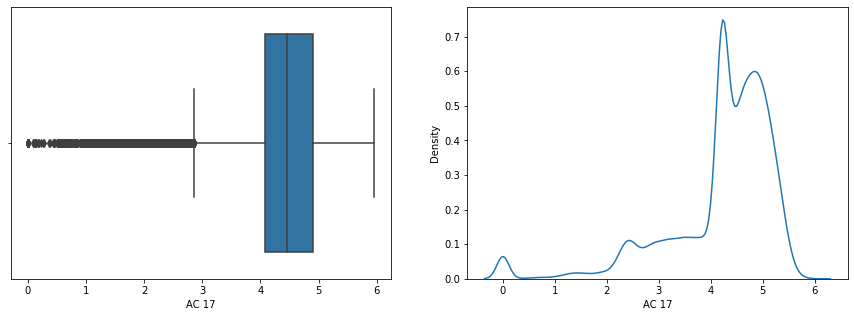

Skewness in data of feature AC 18 = -0.8297706904730133


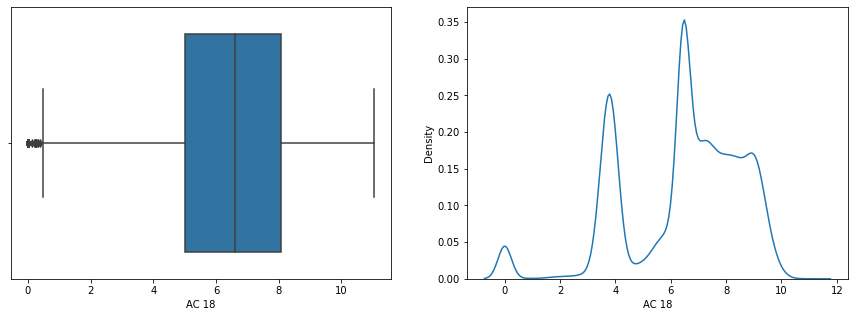

Skewness in data of feature AC 2 = 0.3167020828652189


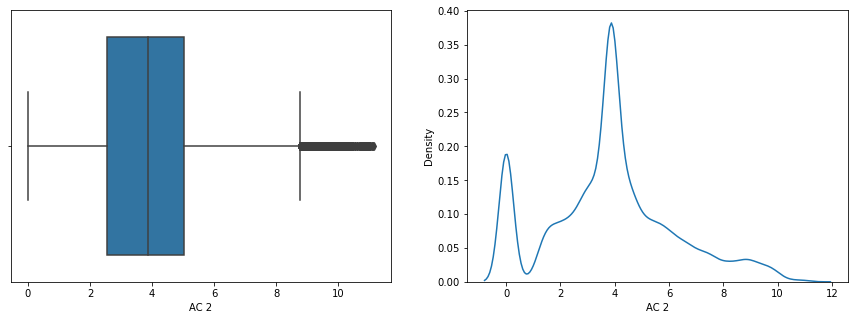

Skewness in data of feature AC 3 = 0.3620973287676793


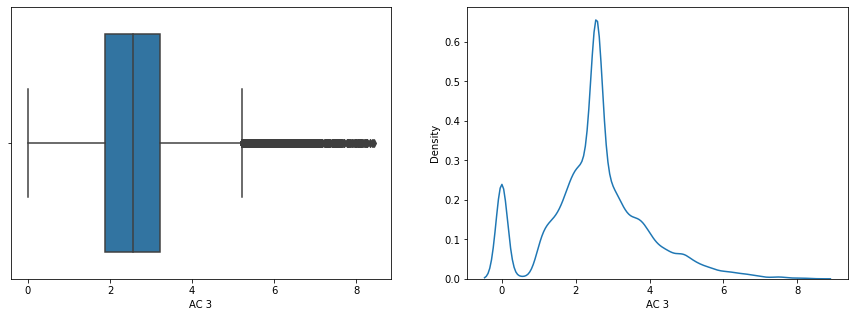

Skewness in data of feature AC 4 = 0.5337372193480854


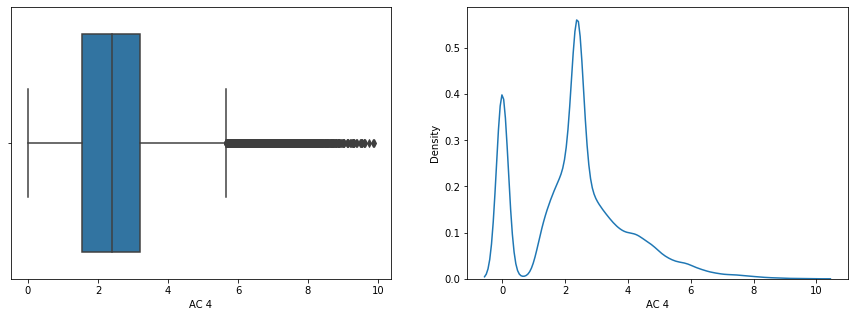

Skewness in data of feature AC 5 = 0.32051259012373806


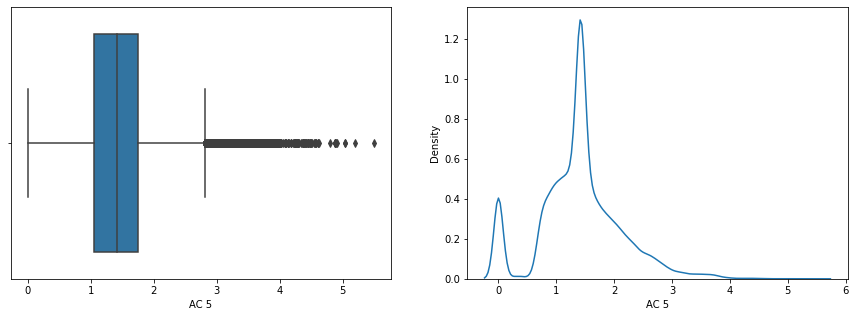

Skewness in data of feature AC 6 = -0.02167917224377037


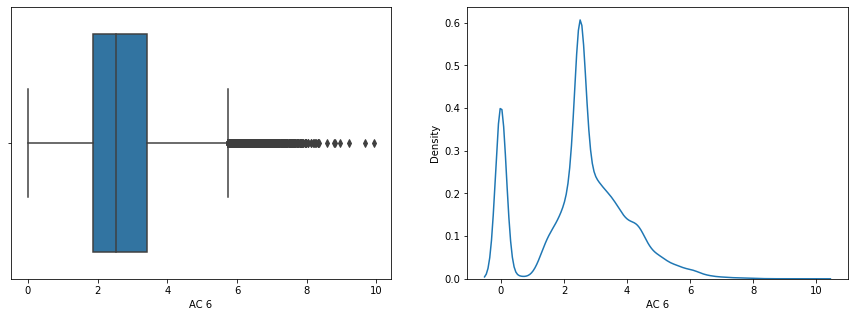

Skewness in data of feature AC 7 = -0.07002538085392777


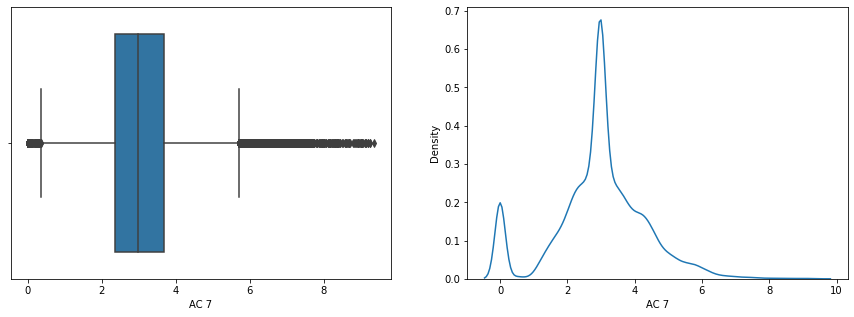

Skewness in data of feature AC 8 = -0.010520804945990834


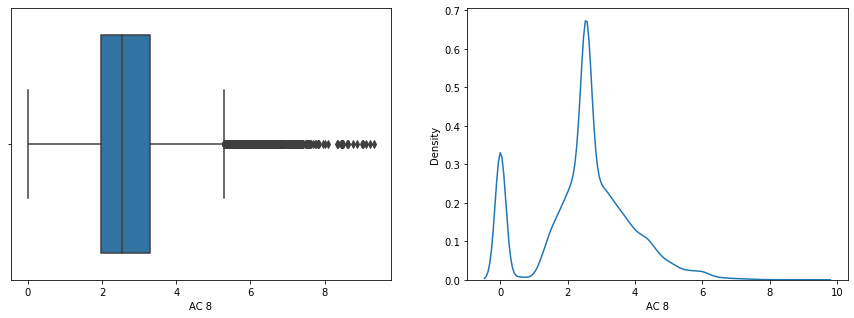

Skewness in data of feature AC 9 = 0.261468736222967


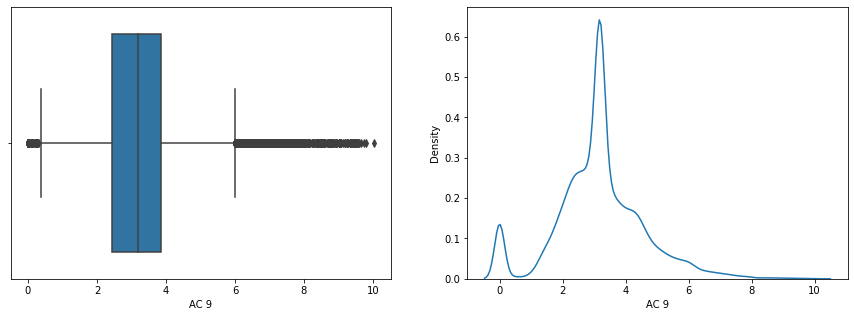

In [14]:

for col in df.columns.difference(['Time','Date']):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.boxplot(data=df,x=df[col],ax=ax1) # We can clearly see the presence of outliers and also the skewness in data. Thus we can use IQR to remove outlier 
    sns.kdeplot(data=df,x=df[col],ax=ax2) # from this feature
    print('Skewness in data of feature {} ='.format(col),df[col].skew())
    plt.show()

##### From the above plots we can clearly see the presence of outliers as well as the distribution of data. Thus we can use IQR method to remove outliers which is one out of many methods available for outlier detection.

In [15]:
for col in df.columns.difference(['Date','Time']):
    percentile_25= df[col].quantile(0.25)
    percentile_75= df[col].quantile(0.75)
    iqr=percentile_75-percentile_25
    upper_limit= percentile_75+1.5*iqr
    lower_limit= percentile_25-1.5*iqr
    cal_median=df.loc[df[col] < upper_limit, col].median()
    df[col]= np.where(df[col]> upper_limit, cal_median,df[col])
    df[col]= np.where(df[col]< lower_limit, cal_median,df[col])

In [16]:
df.describe() # Data looks better than earlier.

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Time
count,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000,51979.000000
mean,2.269037,3.647064,2.428066,2.226385,1.356084,2.441303,3.115228,2.451796,3.229431,1.557699,2.236224,2.856427,4.325078,2.821632,4.192696,2.627378,4.494152,6.642235,11.530137
std,1.899373,2.038116,1.155459,1.395585,0.603265,1.412786,0.883013,1.244778,0.948816,0.454402,1.155617,0.805704,1.167762,1.181959,1.157919,1.202319,0.553859,1.831909,6.927586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353176,0.000000,0.381053,0.190820,0.000000,0.209071,0.905287,0.000000,0.592684,0.000000,2.852010,0.488318,0.000000
25%,0.000000,2.546536,1.875004,1.541800,1.051897,1.865673,2.661159,1.962985,2.648969,1.271547,1.775423,2.460520,3.647206,2.037829,3.594844,2.042392,4.218979,5.683846,6.000000
50%,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.454127,6.594090,12.000000
75%,3.151626,4.657950,3.024938,2.943520,1.661945,3.313245,3.568964,3.170310,3.680043,1.791787,2.825637,3.251981,4.900012,3.479369,4.636198,3.221523,4.896242,8.077507,18.000000
max,8.261886,8.751443,5.212839,5.665063,2.804735,5.731632,5.700791,5.289556,5.987608,2.864516,4.939855,5.288607,7.652870,5.952511,7.538689,5.585092,5.950261,11.040031,23.000000


In [17]:
df['Is_weekend']=pd.to_datetime(df['Date']).dt.dayofweek > 4   # Checking if the given day was Weekend or not
df['Is_weekend']=df['Is_weekend'].replace([True,False],[1,0])


In [18]:
india_holiday=holidays.India(years=2019)                       # Checking if given day was Holiday or not
indian_holiday_lst=india_holiday.keys()
df['IsHoliday']=df['Date'].isin(indian_holiday_lst)
df['IsHoliday']=df['IsHoliday'].replace([True,False],[1,0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51979 entries, 0 to 87839
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AC 1        51979 non-null  float64
 1   AC 2        51979 non-null  float64
 2   AC 3        51979 non-null  float64
 3   AC 4        51979 non-null  float64
 4   AC 5        51979 non-null  float64
 5   AC 6        51979 non-null  float64
 6   AC 7        51979 non-null  float64
 7   AC 8        51979 non-null  float64
 8   AC 9        51979 non-null  float64
 9   AC 10       51979 non-null  float64
 10  AC 11       51979 non-null  float64
 11  AC 12       51979 non-null  float64
 12  AC 13       51979 non-null  float64
 13  AC 14       51979 non-null  float64
 14  AC 15       51979 non-null  float64
 15  AC 16       51979 non-null  float64
 16  AC 17       51979 non-null  float64
 17  AC 18       51979 non-null  float64
 18  Date        51979 non-null  object 
 19  Time        51979 non-nul

##### Now that we have cleaned the data, we can start analysis for questions asked and more. But before that lets pull the gurgaon daily temperature on hourly basis for the exact same day.

# Solution for Question 3: Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?

In [20]:
api_key='71e908c3b4214ae997b122710220401'  # Using api of worldweatheronline.com
city='Gurgaon'
start_date=df['Date'].min()
aug_end_date='2019-08-31'
sep_start_date='2019-09-01'
end_date=df['Date'].max()

##### While pulling the data, api was not able provide all of data in 1 chunk. Thats why I needed pull the data in 2 chunks

In [21]:
lst=[]
for i in range(2):   # Using loop to pull the data in 2 chunks
    if i==0:
        url='http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={key}&q={city}&format=json&date={start_date}&enddate={end_date}&tp=1'.format(key=api_key,city=city,start_date=start_date,end_date=aug_end_date)
    else:
        url='http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={key}&q={city}&format=json&date={start_date}&enddate={end_date}&tp=1'.format(key=api_key,city=city,start_date=sep_start_date,end_date=end_date)
    response=requests.get(url).json()
    for dt in response['data']['weather']:
        for hr in dt['hourly']:
            lst.append((dt['date'],hr['time'],hr['tempC']))


In [22]:
df2= pd.DataFrame(lst,columns=['Date','Time','Temp','Is_weekend','IsHoliday']) # Converting json response to dataframe

In [23]:
df2['Time']=pd.to_datetime((df2['Time'].astype(int)/100),format='%H').dt.hour  #changing the data type so that dataframes can be merged
df2['Temp']=df2['Temp'].astype(float)
df2['Date']=pd.to_datetime(df2['Date']).dt.date

In [24]:
df.reset_index(drop=True,inplace=True)  # Resetting the index

In [25]:
df3=pd.merge(df,df2,on=['Date','Time'],how='left')  # Merging the dataframe hvaing json data with original dataframe.

##### Final Dataframe after cleaning the data and getting the outside temperature on hourly basis

In [26]:
df3.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Date,Time,Is_weekend,IsHoliday,Temp
0,7.518632,3.868892,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01,0,0,0,31.0
1,7.426114,3.868892,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01,0,0,0,31.0
2,7.052986,3.868892,0.0,0.0,2.592095,3.800127,2.332304,2.548711,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01,0,0,0,31.0
3,6.665446,3.868892,0.0,0.0,2.575639,3.772891,2.596200,2.548711,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,2019-08-01,0,0,0,31.0
4,6.674838,3.868892,0.0,0.0,2.021472,3.155697,2.845417,2.548711,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,2019-08-01,0,0,0,31.0


# Solution for Question 2: Which AC was most/least used?

<AxesSubplot:>

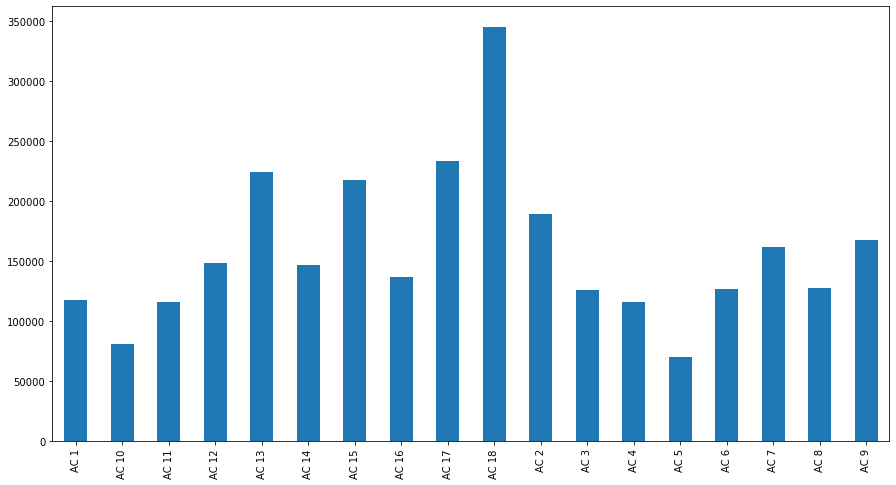

In [27]:
plt.figure(figsize=(15,8))
df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().plot.bar()

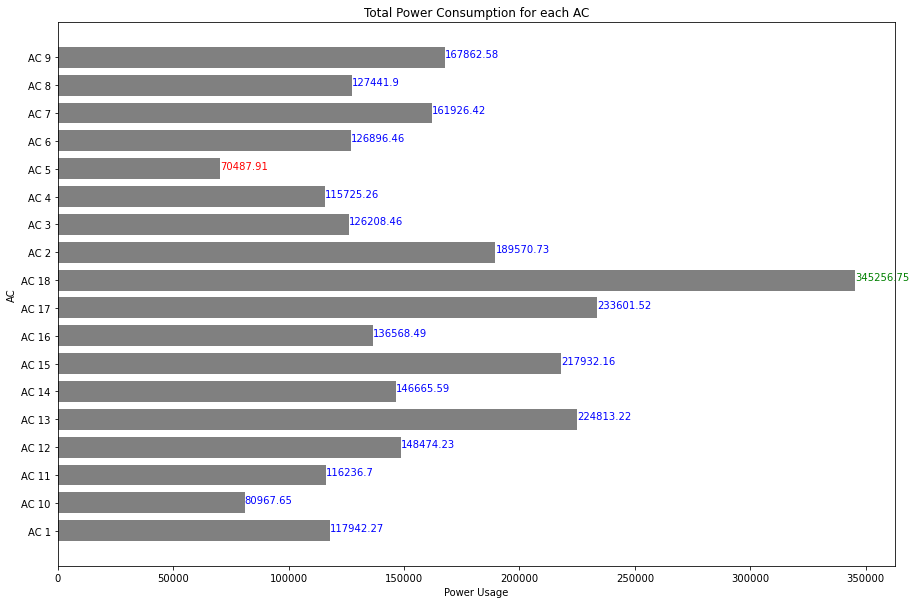

In [31]:
fig,ax= plt.subplots(figsize=(15,10))
width=0.75
max_color= ['b' if (x<max(df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().values.round(2))) else 'r' for x in df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().values.round(2)]
ind=df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])
ax.barh(ind,df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().values.round(2),width,color='grey')
for i,j in enumerate(df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().values.round(2)):
    if j==min(df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().values.round(2)):
        ax.text(j+5,i,str(j),color='r')
    elif j==max(df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum().values.round(2)):
        ax.text(j+5,i,str(j),color='g')
    else:
        ax.text(j+5,i,str(j),color='b')
plt.title('Total Power Consumption for each AC')
plt.xlabel('Power Usage')
plt.ylabel('AC')
plt.show()

##### From above two graphs we can clearly see that :                                                                                               Most Used Ac = AC 18 which was having a total power usage of 345256.75 over the given time period                                                    Similary Least Used Ac = AC 5 with total power usage of 70487.91

In [ ]:
df3['Total_Per_Day_Power_Consumption']=df3[df3.columns.difference(['Date','Time','Temp','Is_weekend','IsHoliday'])].sum(axis=1)  
# Adding the target variable which is power consumption per day for the entire hotel

# Solution for Question 1 : Identify patterns/trends in the data?

##### The Provided data contained approximately 45% null values.
##### The data consist of multiple outliers
##### There was slight skewness in data for few of the features
##### In the below figure we can clearly see that there exist a corelation in between multiple features. Some features like AC 1 and Temp is having negative correlation which means AC 1 was used more when temperature was cool. Similarly AC 17 is having strong corelation and is its usage is directly dependedent on outside temperature

<AxesSubplot:>

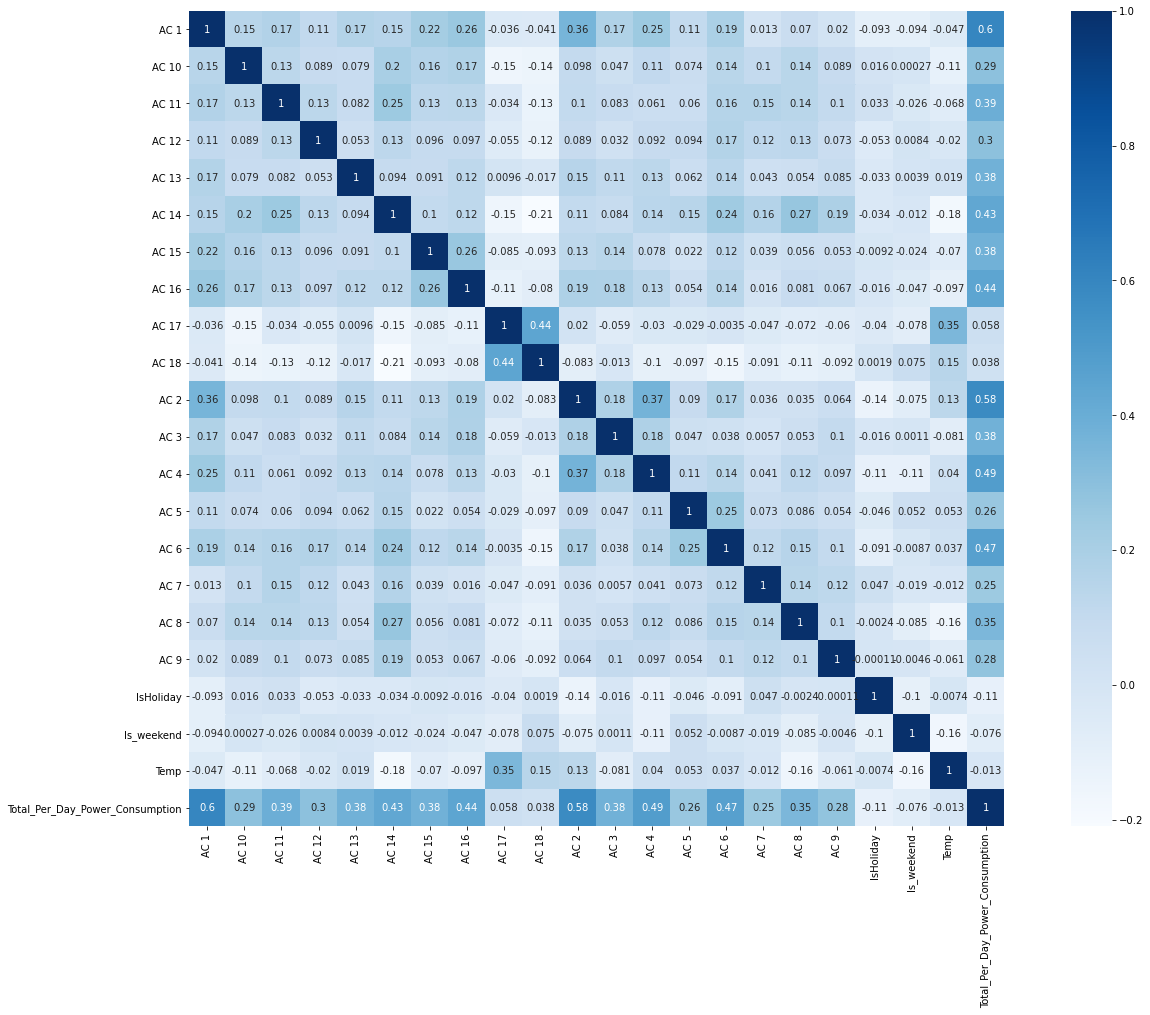

In [72]:
plt.figure(figsize=(24,15))
sns.heatmap(df3[df3.columns.difference(['Time'])].corr(),cbar=True,square=True,annot=True, cmap='Blues')  # Plotting correlation between features

#### From the below graphs we can clearly see that for some AC's the consumption is greater on regular day whereas for some AC's it is greater on holiday or weekend.

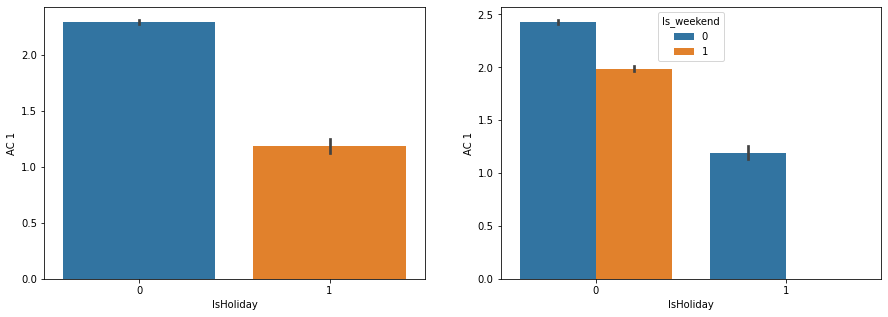

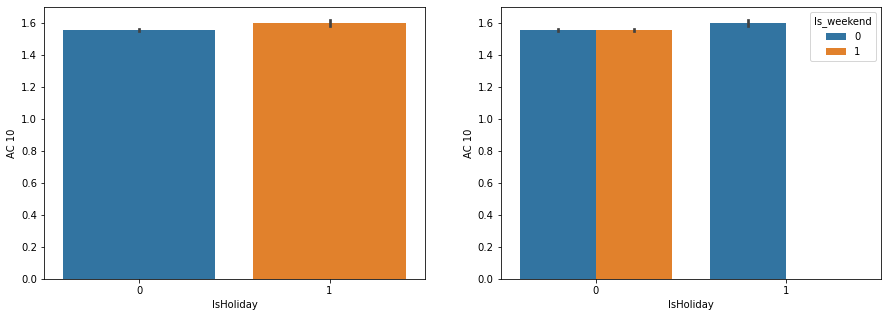

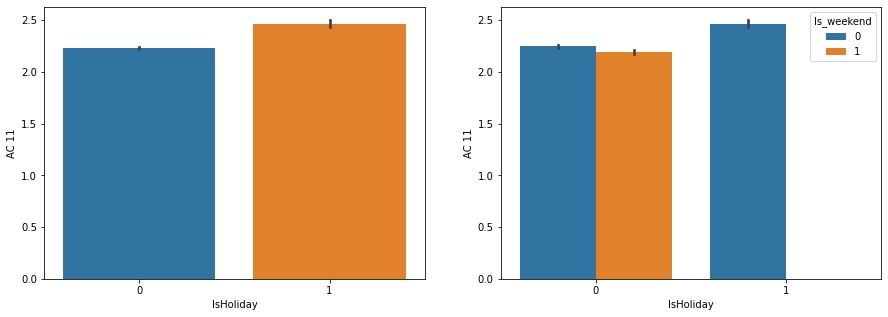

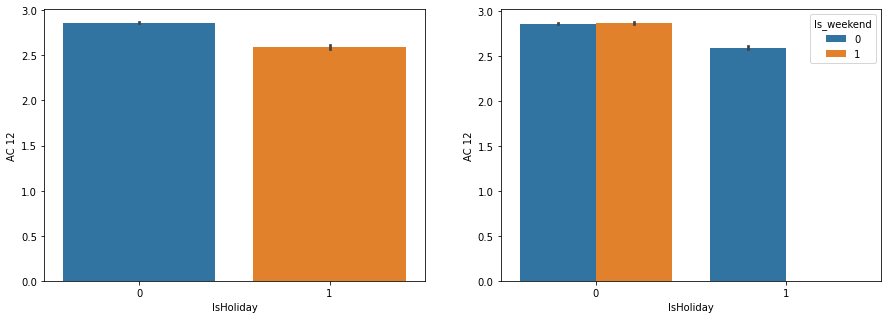

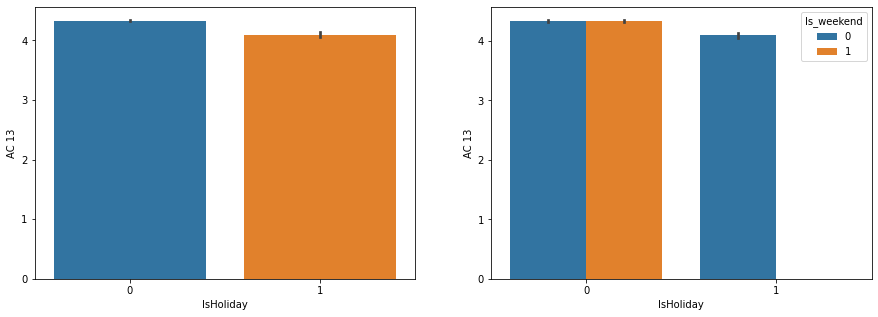

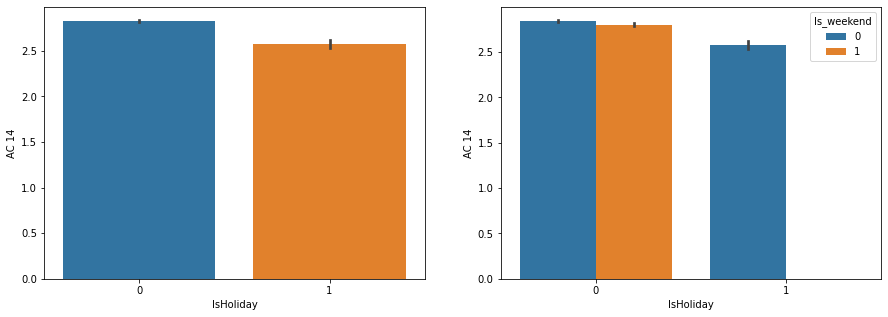

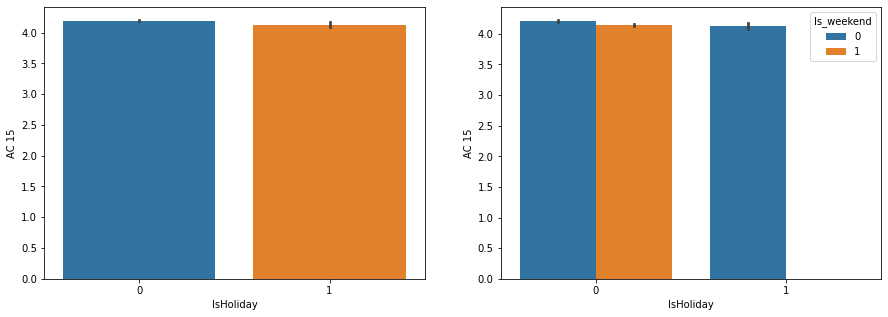

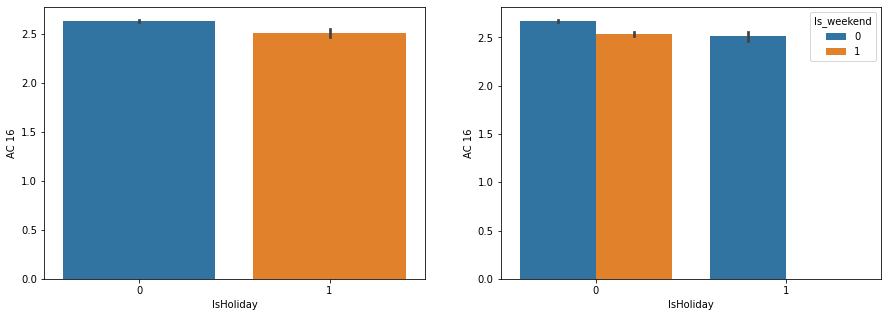

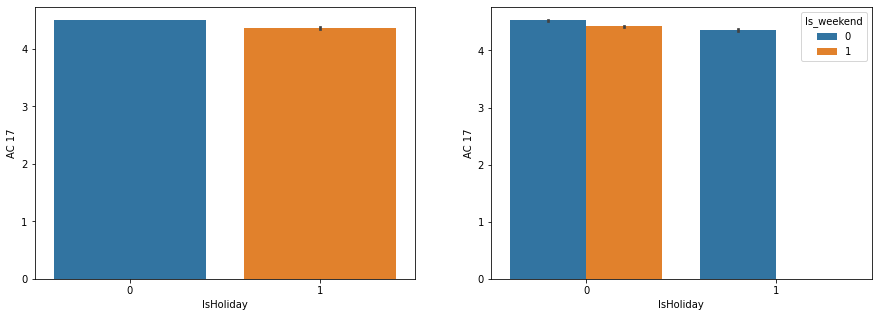

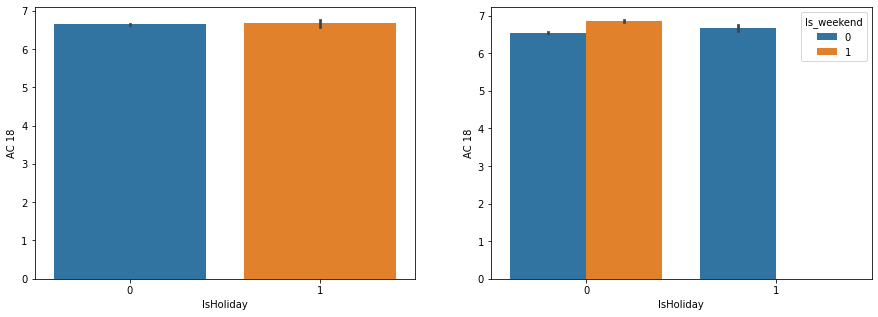

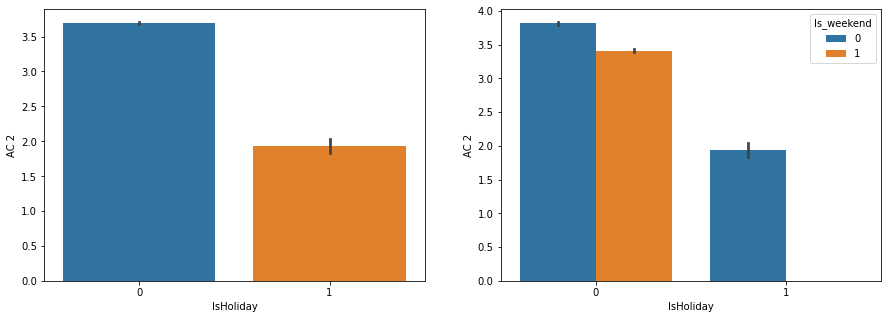

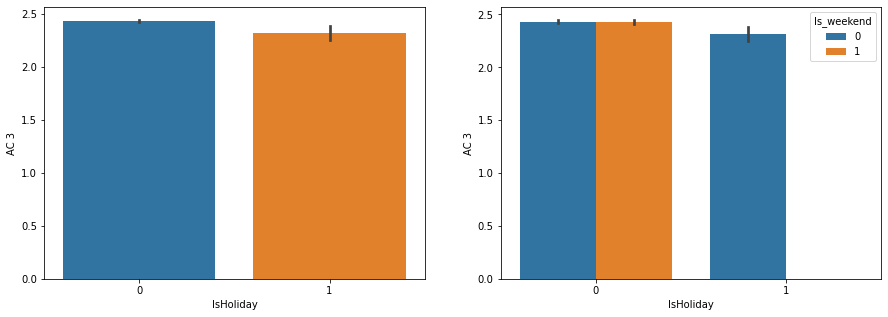

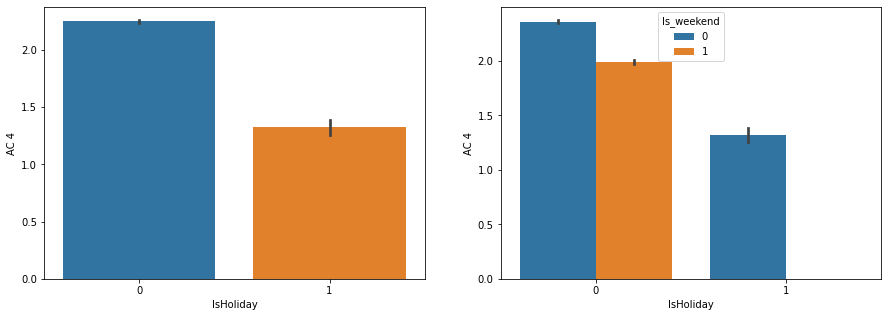

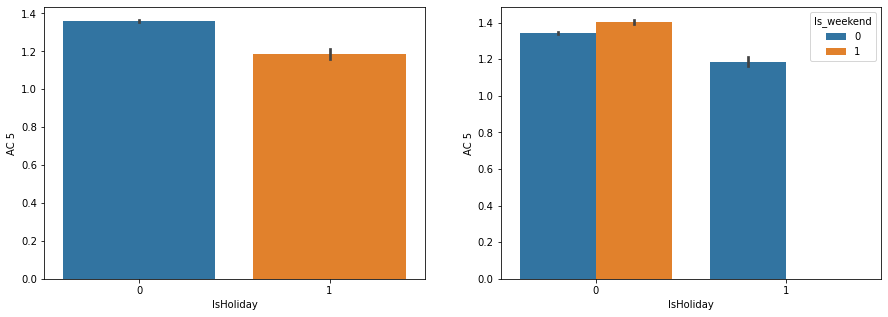

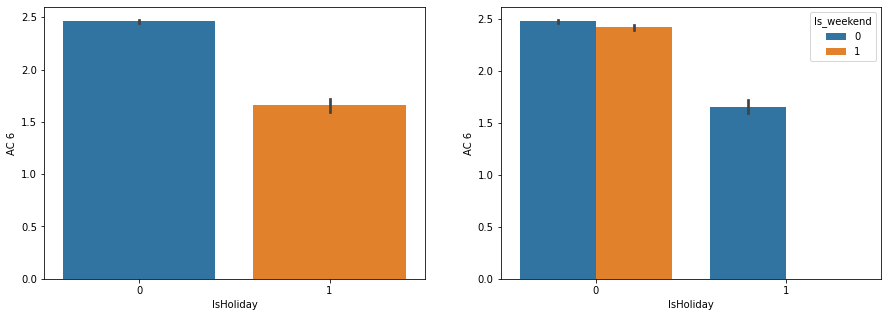

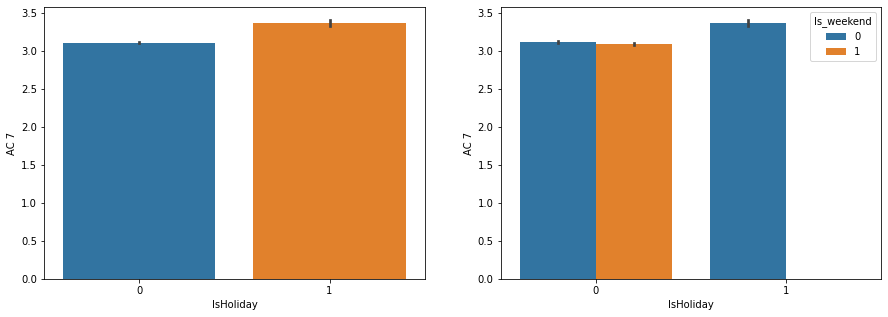

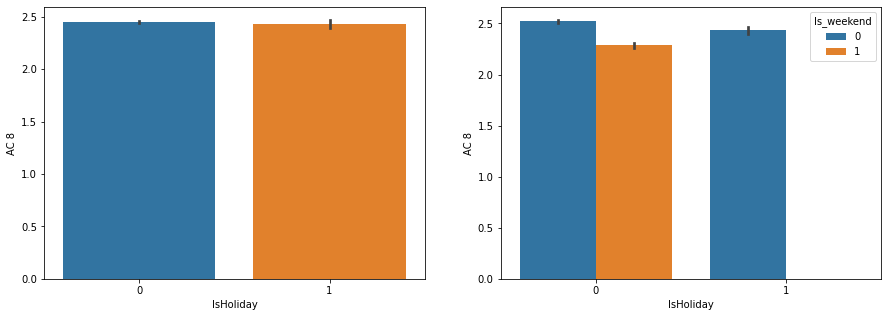

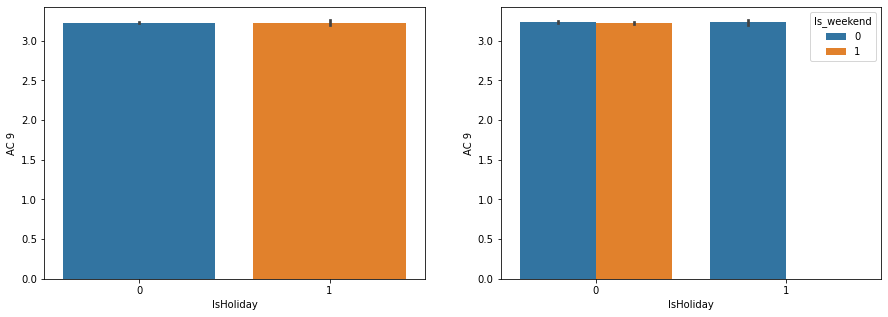

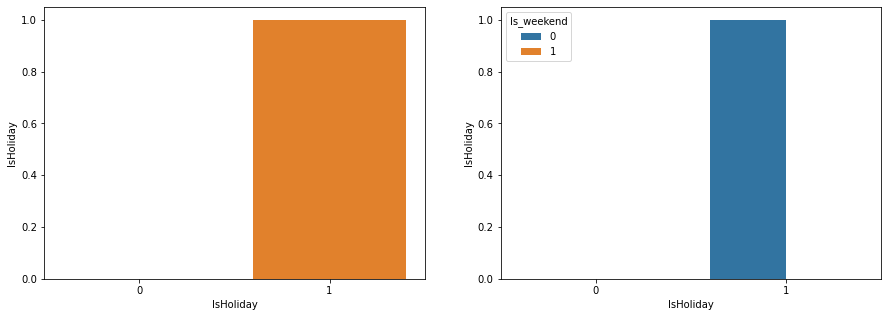

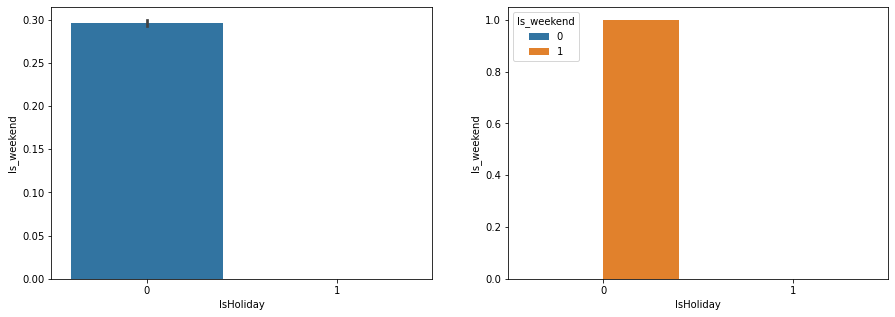

In [75]:

for col in df.columns.difference(['Time','Date','Temp']):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x='IsHoliday',y=df3[col],data=df3,ax=ax1)
    sns.barplot(x='IsHoliday',y=df3[col],data=df3,hue='Is_weekend',ax=ax2)
    plt.show()

# Solution for Question 4: Using the power data, predict/forecast the power consumption?

#### Model For Prediction

In [36]:
X=df3.drop(['Total_Per_Day_Power_Consumption','Time','Date'],axis=1)  # keeping all independent features together for model building
y=df3['Total_Per_Day_Power_Consumption']     # selecting target variable

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting the data into train test with test size of 30%.

In [38]:
model=XGBRegressor()   # Initiating XGBRegressor. Since number of features is not too much XGB should be great.

In [39]:
model.fit(X_train,y_train) # Fitting the model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
y_train_pred=model.predict(X_train)  # Prediction for train dataset
y_test_pred=model.predict(X_test)    # Prediction for test dataset

In [51]:
r2_score=metrics.r2_score(y_train,y_train_pred)                     # Calculating r2,mse,mae performance 
mae_score= metrics.mean_absolute_error(y_train,y_train_pred)        # metrics used to evaluate the model for train dataset
mse_score = metrics.mean_squared_error(y_train,y_train_pred)

print("R2 error=",r2_score)
print('Mean Absolute Error =',mae_score)
print('Mean Squared Error =',mse_score)

R2 error= 0.988303408343105
Mean Absolute Error = 0.6703300077128019
Mean Squared Error = 0.7529664547087496


In [52]:
r2_score=metrics.r2_score(y_test,y_test_pred)                       # Calculating r2,mse,mae performance
mae_score= metrics.mean_absolute_error(y_test,y_test_pred)          # metrics used to evaluate the model for train dataset
mse_score = metrics.mean_squared_error(y_test,y_test_pred)

print("R2 error=",r2_score)
print('Mean Absolute Error =',mae_score)
print('Mean Squared Error =',mse_score)

R2 error= 0.9728486072234522
Mean Absolute Error = 1.0096865909652615
Mean Squared Error = 1.7549286006101852


##### Since the evaluation matrix for both train and test is having approximately same score. Thus we can say that the model performed well.

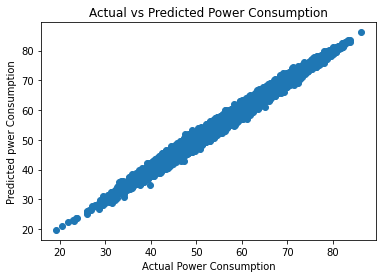

In [56]:
plt.scatter(y_train,y_train_pred)                               # Visualizing the prediction vs actual for train dataset. 
plt.xlabel('Actual Power Consumption')                          # The predicted values are very close to the actual value.
plt.ylabel('Predicted pwer Consumption')                        # Thus we can say model is good
plt.title('Actual vs Predicted Power Consumption')
plt.show()

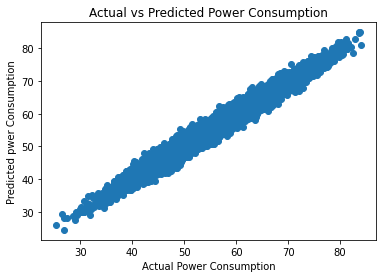

In [57]:
plt.scatter(y_test,y_test_pred)                               # Visualizing the prediction vs actual for train dataset. 
plt.xlabel('Actual Power Consumption')                          # The predicted values are very close to the actual value.
plt.ylabel('Predicted pwer Consumption')                        # Thus we can say model is good
plt.title('Actual vs Predicted Power Consumption')
plt.show()

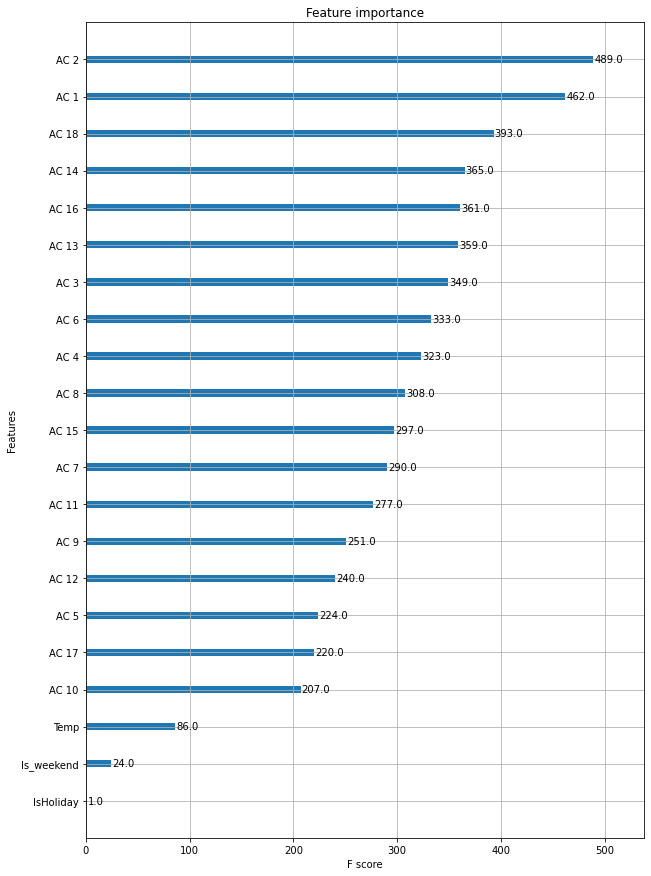

In [83]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
plot_importance(model,ax=ax)
plt.show()

#### From the above graph we can clearly see which of the features are most important and can perform feature selection based on that.

### In Conclusion, I can say that this model can be treated as baseline model with it has great validation score and many other things can be done on top of it to improve the performance of model like performing hyper parameter tuning, feature selection while using threshold value and other algorithms as well.